In [1]:
import pandas as pd

In [2]:
links_Data=pd.read_csv("links.csv")

In [3]:
links_Data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## There are 8 null values in tmdbId column


In [4]:
links_Data.isnull().sum()


movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [5]:
print("links data  shape : ",links_Data.shape)

links data  shape :  (9742, 3)


In [6]:
movies_Data=pd.read_csv("movies.csv")

In [7]:

print("movie data shape",movies_Data.shape)
movies_Data.head()

movie data shape (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## No null values  in links dataset

In [8]:
movies_Data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
# merging movies and links 
link_and_Movie=pd.merge(links_Data,movies_Data,on='movieId')

In [10]:

print("link and Movie  data shape",link_and_Movie.shape)
link_and_Movie.head()

link and Movie  data shape (9742, 5)


,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


## Link and movie combined have only 8 null values in the tmdbId column

In [11]:
link_and_Movie.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
title      0
genres     0
dtype: int64

In [12]:
rating_Data = pd.read_csv("ratings.csv")

In [13]:
print("rating data shape",rating_Data.shape)
rating_Data.head()

rating data shape (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Rating data don't have any null values in any columns

In [14]:
rating_Data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
tags_Data=pd.read_csv("tags.csv")

In [16]:
print("Tags data shape",tags_Data.shape)
tags_Data.head()

Tags data shape (3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Tags data does not have any null values in any column

In [17]:
tags_Data.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [18]:
# merging movies and links 
rating_and_tag1=pd.merge(rating_Data,tags_Data)
rating_and_tag2=pd.merge(rating_Data,tags_Data, on=["userId"])
rating_and_tag3=pd.merge(rating_Data,tags_Data, how="left",on=["userId","movieId","timestamp"])
rating_and_tag4=pd.merge(rating_Data,tags_Data, how="right",on=["userId","movieId","timestamp"])
rating_and_tag5=pd.merge(rating_Data,tags_Data, how="outer",on=["userId","movieId","timestamp"])



In [19]:
print("default join",rating_and_tag1.shape)
print("inner with only user id",rating_and_tag2.shape)
print("left join ",rating_and_tag3.shape)
print("right join",rating_and_tag4.shape)
print("outer join",rating_and_tag5.shape)

default join (0, 5)
inner with only user id (4626866, 7)
left join  (100836, 5)
right join (3683, 5)
outer join (104519, 5)


In [20]:
print("********outer join ******")
print(rating_and_tag5.isnull().sum())

********outer join ******
userId            0
movieId           0
rating         3683
timestamp         0
tag          100836
dtype: int64


In [21]:
print("********right join ******")
print(rating_and_tag4.isnull().sum())

********right join ******
userId          0
movieId         0
rating       3683
timestamp       0
tag             0
dtype: int64


In [22]:
#going with the oouter 
rating_and_tag = pd.merge(rating_Data,tags_Data, how="outer",on=["userId","movieId","timestamp"])

In [23]:
print("link and movie :",link_and_Movie.shape)
print("rating and tag :",rating_and_tag.shape)
print("link and movie unique attribute : ",link_and_Movie.movieId.unique())
print("rating and tag unique attribute : ",rating_and_tag.movieId.unique())
print("link and Movie info",)

link and movie : (9742, 5)
rating and tag : (104519, 5)
link and movie unique attribute :  [     1      2      3 ... 193585 193587 193609]
rating and tag unique attribute :  [    1     3     6 ... 32371 34482 85565]
link and Movie info


In [24]:
link_and_Movie.head(10)

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
5,6,113277,949.0,Heat (1995),Action|Crime|Thriller
6,7,114319,11860.0,Sabrina (1995),Comedy|Romance
7,8,112302,45325.0,Tom and Huck (1995),Adventure|Children
8,9,114576,9091.0,Sudden Death (1995),Action
9,10,113189,710.0,GoldenEye (1995),Action|Adventure|Thriller


In [25]:
print(rating_and_tag['movieId'] == 1)
rating_and_tag.head(10)


0          True
1         False
2         False
3         False
4         False
          ...  
104514    False
104515    False
104516    False
104517    False
104518    False
Name: movieId, Length: 104519, dtype: bool


,userId,movieId,rating,timestamp,tag
0,1,1,4.0,964982703,NaN
1,1,3,4.0,964981247,NaN
2,1,6,4.0,964982224,NaN
3,1,47,5.0,964983815,NaN
4,1,50,5.0,964982931,NaN
5,1,70,3.0,964982400,NaN
6,1,101,5.0,964980868,NaN
7,1,110,4.0,964982176,NaN
8,1,151,5.0,964984041,NaN
9,1,157,5.0,964984100,NaN


In [26]:
# merging both link,movie and rating,tag
final_Merge=pd.merge(link_and_Movie,rating_and_tag,on='movieId')


In [27]:
print("final merge :",final_Merge.shape)


final merge : (104519, 9)


In [28]:
print("********final merge ******")
print(final_Merge.isnull().sum())

********final merge ******
movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating         3683
timestamp         0
tag          100836
dtype: int64


In [29]:
print("final_Merge")
final_Merge.head(10)

final_Merge


,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN
5,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,NaN
6,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637,NaN
7,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878,NaN
8,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262,NaN
9,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616,NaN


## Exploratory data analysis on prepared Dataset

In [30]:
# Exploring data types of all columns 
data_Types=final_Merge.dtypes
print(data_Types)

movieId        int64
imdbId         int64
tmdbId       float64
title         object
genres        object
userId         int64
rating       float64
timestamp      int64
tag           object
dtype: object


In [31]:
eda_data=final_Merge.copy()
categorical_Features=[feature for feature in final_Merge.columns if eda_data[feature].dtypes=='O']
print("categorical features : ",categorical_Features)

categorical features :  ['title', 'genres', 'tag']


In [33]:
numerical_Features=[feature for feature in final_Merge.columns if eda_data[feature].dtypes!='O']
print("numerical features : ",numerical_Features)

numerical features :  ['movieId', 'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp']


In [35]:
#counting the unique features of categorical data  
for feature in categorical_Features:
    print('The feature is {} and number of categories are {}'.format(feature,len(eda_data[feature].unique())))

The feature is title and number of categories are 9737
The feature is genres and number of categories are 951
The feature is tag and number of categories are 1590


In [36]:
#describing the data
final_Merge.describe(include='all')

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
count,104519.000000,1.045190e+05,104506.000000,104519,104519,104519.000000,100836.000000,1.045190e+05,3683
unique,NaN,NaN,NaN,9737,951,NaN,NaN,NaN,1589
top,NaN,NaN,NaN,Pulp Fiction (1994),Comedy,NaN,NaN,NaN,In Netflix queue
freq,NaN,NaN,NaN,488,7359,NaN,NaN,NaN,131
mean,19710.738191,3.559796e+05,20543.697395,NaN,NaN,329.828280,3.501557,1.209966e+09,NaN
std,35870.238985,6.297058e+05,54157.108637,NaN,NaN,182.849716,1.042529,2.158859e+08,NaN
min,1.000000,4.170000e+02,2.000000,NaN,NaN,1.000000,0.500000,8.281246e+08,NaN
25%,1200.000000,9.965300e+04,710.000000,NaN,NaN,177.000000,3.000000,1.026225e+09,NaN
50%,3022.000000,1.187990e+05,6964.000000,NaN,NaN,333.000000,3.500000,1.186163e+09,NaN
75%,8361.000000,3.172190e+05,11704.000000,NaN,NaN,477.000000,4.000000,1.439317e+09,NaN


In [37]:
final_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104519 entries, 0 to 104518
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    104519 non-null  int64  
 1   imdbId     104519 non-null  int64  
 2   tmdbId     104506 non-null  float64
 3   title      104519 non-null  object 
 4   genres     104519 non-null  object 
 5   userId     104519 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  104519 non-null  int64  
 8   tag        3683 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 8.0+ MB


# Q1. 1. Most frequently occuring values in categorical attributes

## Top 10 most frequent in title category

In [38]:
top_10 =10 
print(final_Merge['title'].value_counts()[:top_10])

Pulp Fiction (1994)                          488
Forrest Gump (1994)                          338
Shawshank Redemption, The (1994)             321
Silence of the Lambs, The (1991)             285
Matrix, The (1999)                           283
Star Wars: Episode IV - A New Hope (1977)    277
Fight Club (1999)                            272
Braveheart (1995)                            247
Jurassic Park (1993)                         239
Terminator 2: Judgment Day (1991)            232
Name: title, dtype: int64


## Top 10 most frequent in genres category

In [39]:
print(final_Merge['genres'].value_counts()[:top_10])

Comedy                              7359
Drama                               6649
Comedy|Romance                      4073
Comedy|Drama|Romance                3105
Drama|Romance                       2968
Comedy|Drama                        2931
Action|Adventure|Sci-Fi             2467
Crime|Drama                         2386
Action|Crime|Thriller               1585
Action|Adventure|Sci-Fi|Thriller    1473
Name: genres, dtype: int64


## Top 10 most frequent in tag category

In [40]:
print(final_Merge['tag'].value_counts()[:top_10])

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
surreal               23
funny                 23
Disney                23
religion              22
psychology            21
quirky                21
Name: tag, dtype: int64


# 2.Counting of NaN values per column

In [41]:
final_Merge.isna().sum()

movieId           0
imdbId            0
tmdbId           13
title             0
genres            0
userId            0
rating         3683
timestamp         0
tag          100836
dtype: int64

## counting unique values for each column

In [42]:
# counting unique values in each column 
unique_Values=final_Merge.nunique()
print(unique_Values)

movieId       9742
imdbId        9742
tmdbId        9733
title         9737
genres         951
userId         610
rating          10
timestamp    88453
tag           1589
dtype: int64


# 3.Plotting Correlations between features

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

            movieId    imdbId    tmdbId    userId    rating  timestamp
movieId    1.000000  0.860234  0.746341 -0.001438 -0.004061   0.500822
imdbId     0.860234  1.000000  0.834988 -0.008595 -0.007806   0.410893
tmdbId     0.746341  0.834988  1.000000 -0.001941 -0.023532   0.293208
userId    -0.001438 -0.008595 -0.001941  1.000000 -0.049348   0.097758
rating    -0.004061 -0.007806 -0.023532 -0.049348  1.000000  -0.005802
timestamp  0.500822  0.410893  0.293208  0.097758 -0.005802   1.000000


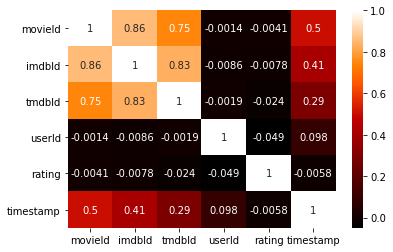

In [44]:

print(final_Merge.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(final_Merge.corr(),cmap='gist_heat', annot=True)
  
# displaying heatmap
plt.show()

In [49]:
moviemat = final_Merge.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
ratings = pd.DataFrame(final_Merge.groupby('title')['rating'].mean())


In [51]:
ratings['num of ratings'] = pd.DataFrame(final_Merge.groupby('title')['rating'].count())
ratings

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [53]:
ratings.sort_values('num of ratings',ascending=False).head(20)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [74]:
for moviemat['title'] in moviemat:
    MovR=moviemat['title']
    for i in MovR:
        Msim=moviemat.corrwith[i]
        corr_Movie = pd.DataFrame(Msim,columns=['Correlation'])
        corr_Movie.dropna(inplace=True)
        corr_Movie = corr_Movie.join(ratings['num of ratings'])
        corr_Movie[corr_Movie['num of ratings']>100].sort_values('Correlation',ascending=False).head()
    

TypeError: 'method' object is not subscriptable

In [54]:
ForrestGump_userR = moviemat['Forrest Gump (1994)']
ShawshankRedemp_userR = moviemat['Shawshank Redemption, The (1994)']

In [56]:
ForrestGump_userR .head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [57]:
ShawshankRedemp_userR.head()

userId
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [58]:
#for similar movies, use corrwith function
FGumpsimilar = moviemat.corrwith(ForrestGump_userR)
SRedempsimilar = moviemat.corrwith(ShawshankRedemp_userR )

C:\Users\RIZWAN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\RIZWAN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [59]:
#making a dataframe to get a well structured result 
corr_Fgump = pd.DataFrame(FGumpsimilar,columns=['Correlation'])
corr_Fgump.dropna(inplace=True)
corr_Fgump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [62]:
#sorting the values in descending order to know which are the most similar movies(higher correlation,greater the similarity 
#factor )
corr_Fgump.sort_values('Correlation',ascending=False).head(20)


,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


In [64]:
# though a greater correlation indicates similarity, it doesn't seem possible for so many movies that we haven't heard of to be 
#as gppd as Forest Gump since this is solely based on ratings which might not be relevant for all the  movies, since some maybe rated
#by very few people and thus their avergae sums up to a high number but they haven't been watched by majority of the people.

corr_Fgump = corr_Fgump.join(ratings['num of ratings'])
corr_Fgump.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [68]:
# Re accesing only the movies with >100 reviews/ratings

corr_Fgump[corr_Fgump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
